# Devoir 1 

Rédigé par Corey Ducharme et Olivier Sirois

## Préamble

In [1]:
using JuMP
using Clp
using Distributions
using PyPlot

## Problème du vendeur de journeaux

### Effet de l'écart-type 

#### Effet de l'écart-type sur la décision de première étape

Comme vue en classe, la solution du problème du vendeur de journeaux avec un demande suivant une distribution Normale de moyenne $\mu$ et de variance $\sigma^2$ est 

<center>$ x^* = N^{-1}_{(\mu, \, \sigma^2)}\left(\frac{q-c}{q-r}\right)$</center>

Dans cette question, nous étudions l'effet de l'écart-type. Ainsi, nous allons tracer la relation entre la solution et l'écart-type pour des valeurs entière d'écart-type allant de 0 à 200.

Évidamment, la distribution Normal n'est pas défini pour un écart type de 0. Par contre, la solution de 1ère étape est évidente pour un tel écart-type. En effet, si le vendeur de journeaux connait exactement la demande (pas de variance), la solution optimale est tout simplement la demande moyenne qui est de 650 dans notre contexte. 

Calcul des valeurs pour notre espace de 1 à 200.

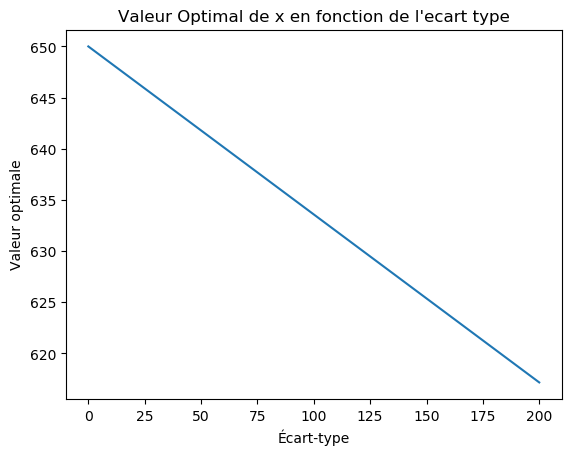

In [2]:
# Constantes
c = 0.15
q = 0.25
r = 0.02
mu = 650


solutions_optimales = [quantile(Normal(mu, x), (q-c)/(q-r)) for x in 1:200]

# On ajoute la solution optimales pour un écart-type de 0
unshift!(solutions_optimales, mu)

# Graphique de la relation
plot(range(0,201), solutions_optimales)
title("Valeur Optimal de x en fonction de l'ecart type")
xlabel("Écart-type")
ylabel("Valeur optimale")
show()

Comme nous pouvons constater, la solution optimal décroie linéairement avec l'écart-type. Ce résultat est attendue si nous étudions l'équation pour la solution. En effet, nous pouvons transformer l'équation de notre solution optimal en la ramenant à une normal centrée réduite.

<center>$ x^* = \sigma \phi^{-1}\left(\frac{q-c}{q-r}\right) + \mu$</center>

Où $\sigma$ est l'écart-type et $\phi$ est la distribution d'une Normale (0, 1).

In [3]:
quantile(Normal(0,1), 0.1/0.23)

-0.16421077707933102

Donc, le graphique est tout simplement cette équation linéaire où la pente est $\phi^{-1}(0.1/0.23) \approx -0.16$

#### Éffet de l'écart-type sur la fonction stochastique

Nous cherchons issue à évaluer la fonction 

<center> $\mathcal{Q}(x) = qx - (q-r) \int_{-\infty}^x F(\omega) d\omega$ </center>
    
pour un écart-type allant de 0 à 200. 

Or $\mathcal{Q}(x)$, dépend de x et non pas uniquement de l'écart-type. Par contre, nous venons précédamment de calculer les valeurs optimales de x pour les différents écart-type. Ainsi, nous utilisons la valeur optimal de x pour chaque écart-type que nous avons calculées lorsque nous effectuons le calcul de $\mathcal{Q}$. 

Pour calculer $\mathcal{Q}(x)$, nous avons trouver que la valeur de l'intégral comme suivant 

<center>
$\begin{align}
\int_{-\infty}^x F(\omega) d\omega &= \int_{-\infty}^x \Phi(\mu, \sigma^2) \\
 &= \int_{-\infty}^x  \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{\omega - \mu}{\sqrt2 \sigma} \right) \right] d\omega \\
 &= \frac{1}{2} \int_{-\infty}^x \text{erfc} \left(- \frac{\omega - \mu}{\sqrt2 \sigma} \right) d\omega \\
 &= \frac{1}{2} (x - \mu) \, \text{erfc} \left(- \frac{x - \mu}{\sqrt2 \sigma} \right) + \frac{\sigma}{2} \sqrt{\frac{2}{\pi}} \exp{\frac{-(x-\mu)^2}{2\sigma^2}}
\end{align}$
</center>


Encore une fois, la valeur pour $\sigma = 0$ n'est pas définie. Par contre, la valeur de la solution stochastic est évidente. Rappellons nous de ce que $\mathcal{Q}$ représente le profit espérer réaliser par la vente de journeaux. Comme la demande de journeaux est connue à 650 (écart-type nul), nous savons que le vendeur va vendre 650. Donc, la valeur de $\mathcal{Q}$ est simplement $650 * q = 162.5 $.

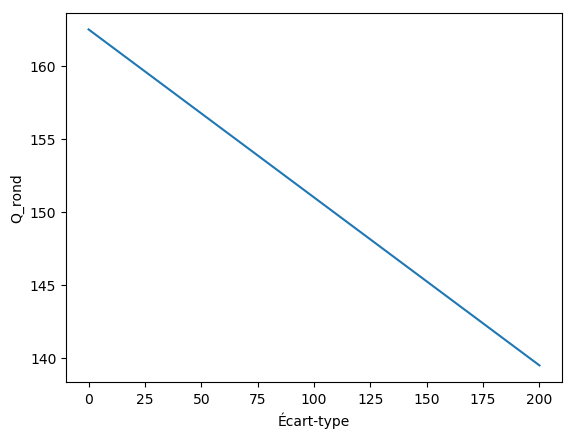

In [4]:
function q_rond(x, sigma)
    int = 1/2 * (x-mu)*erfc(-(x-mu)/(sqrt(2)*sigma)) + sigma/2*sqrt(2/pi)*exp(-(x-mu)^2/2/sigma^2)
    res = q*x - (q-r)*int
    return res
end

stoc_sol = [q_rond(solutions_optimales[i+1], i) for i in 1:200]

unshift!(stoc_sol, 162.5)

# Graphique de la relation
plot(range(0,201), stoc_sol)
xlabel("Écart-type")
ylabel("Q_rond")
show()

Surprenamant, la valeur de la solution stochastic est linéaire en fonction de l'écart-type de la demande.

#### Effet de l'écart-type sur la solution du problème globale

Nous pouvons maintenant tracer, la solution du problème du vendeur de journal en fonction de l'écart-type qui sera aussi sur linéaire.

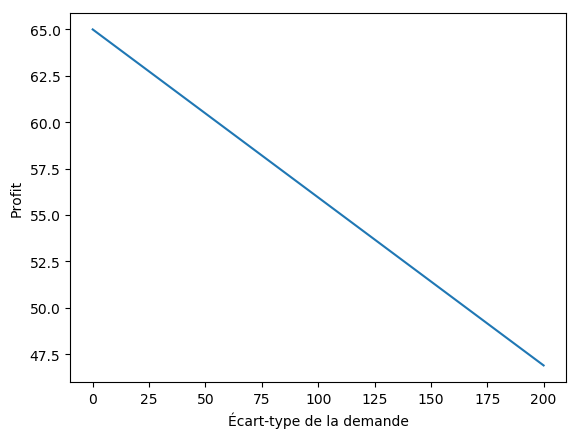

In [5]:
global_sol = [stoc_sol[i] - 0.15*solutions_optimales[i] for i in range(1, 201)]

plot(range(0,201), global_sol)
xlabel("Écart-type de la demande")
ylabel("Profit")
show()

Nous pouvons conclure que le problème du vendeur de journeaux possède des propriétés très faciles à étudier grâce à la linéarité de la solution.

En effet, nous pouvons trouver la valeur ajouté de la connaisse de l'écart-type.

In [6]:
pente = (global_sol[end]-global_sol[1])/200

-0.090527908652303

Ainsi, le gain de connaissance de l'écart-type apporte un profit supplémentaire de 0.09$/écart-type et ceci est invariant de la moyenne de la demande. Elle dépend uniquement des prix d'achat et de vente du journal.

De plus, nous pouvons déterminer la valeur d'écart-type à laquelle le vendeur de journaux peut encore tiré un profit soit l'abscisse à l'origine.

In [7]:
-65/pente

718.0106220022175

#### Effet de l'écart-type sur la valeur de la solution stochastique

Birge définie dans "The value of the stochastic solution in stochastic linear programs with fixed recourse" (1981) comme étant :

<center> $ VSS = EEV - RP $ </center>

où VSS est la valeur de la solution stochastique, EEV est l'espérance de la solution avec valeurs espérées, et RP est le problème avec recours.

Intuitivement, nous pouvons voir la valeur de la solution stochastique comme étant la valeur ajoutée de résoudre le problème avec recours versus l'heuristique de prendre l'espérance des problèmes résolues avec un valeurs espéré sur chaque scénario. Une autre façon de voir la valeur de la solution sotchastique est le coût suplémentaire que le vendeur de journal serait prêt à payer pour demander les services d'un mathématicien doué en optimisation stochastique comme le professeur Fabien Bastin.

Dans la précédente, nous avons calculé les valeurs du problème avec recours pour les différentes valeurs d'écart-type. Nous devons donc dans la prochaine section calculer la valeur de EEV.

Dans notre problème la valeur espérée que le vendeur de journeaux utiliserait est tout simplement $\mu$. Ainsi, nous devons calculer l'espérance des solutions lorsque la valeur de x* est $\mu$ sur tous nos scénarios. Comme notre distribution est continue, nous intégrons et on trouve que l'espérance de nos solutions revient tout simplement à calculer $\mathcal{Q}(x)$ pour $x^* = \mu$. Nous effectuons ce calcul pour les différentes valeurs de l'écart-type.

Regardant, l'équation pour $\mathcal{Q}(x)$, nous pouvons facilement la simplifier dans le cas où $x = \mu$

<center> $\mathcal{Q(\mu)} = \frac{\sigma}{2} \sqrt{\frac{2}{\pi}}$ 

Cette fois si la valeur de $\sigma = 0$ est définie. Or nous pouvons facilement déduire que la solution du EEV pour un écart-type nul est tout simplement $Q * (q-c) = 65$. Soit la même solution que le problème avec recours. En effet, dans ce contexte avec écart-type nul le concept de recours disparait. Il n'y a plus de variables aléatoire.

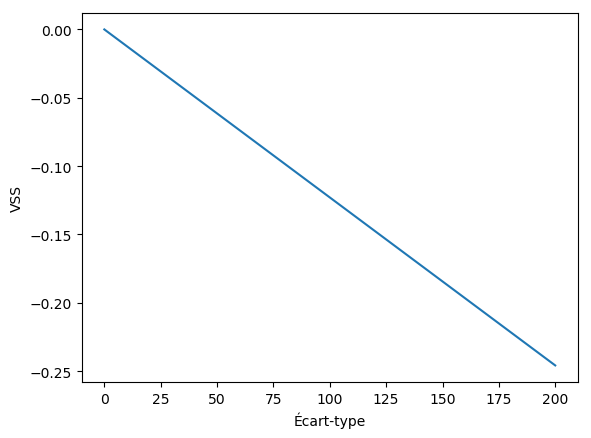

In [26]:
function eev(x, sigma)
    int  = sigma/2 * sqrt(2/pi)
    res = q*x - (q-r)*int - c*x
    return res
end

eev_sol = [eev(650, sigma) for sigma in 0:200]

vss = eev_sol-global_sol

# Graphique
plot(range(0,201), vss)
xlabel("Écart-type")
ylabel("VSS")
show()

Comme attendue, la solution est améliorer en utilisant la solution stochastique. Or, on peut voir que pour notre petit contexte d'école, la valeur de la solution stochastique est très faible environ \$0.10 sur un profit de \$60. On peut conclure que notre mathématicien doué en optimisation stochastique devra vendre ces services très peu chère au vendeur de journaux. Pauvre lui.

## Discrétisation de la demande et simulation Monte Carlo

On définie notre problème de seconde étape en prenant un échantillon discret de notre distribution. Nous pouvons définir un $\hat{\mathcal{Q}}$ échantillonée comme étant définie par 

<center> $\hat{\mathcal{Q}} = \frac{1}{N}\sum_{j=1}^{N}{Q(x, \xi)}$ <center>

Dans la prochaine section, nous allons étudier la valeur $\hat{\mathcal{Q}}$ pour un échantillon allant de $10^k$ k=1:6.

In [27]:
function newsStoch(k::Int64)
    srand(123) # Setting the seed
    # Constantes
    c = 0.15
    q = 0.25
    r = 0.02
    mu = 650
    sigma = 80

    d = Normal(mu, sigma)
    sample = rand(d, k)
    
    m = Model(solver=ClpSolver())
    
    @variable(m, x >= 0)
    @variable(m, y[1:k] >= 0)
    @variable(m, y[i=1:k] <= sample[i])
    @variable(m, w[1:k] >= 0)
    
    @constraint(m, total_sales[i=1:k], y[i] + w[i] <= x)
    
    @objective(m, Max, -c*x + 1/k*sum(q*y[i] + r*w[i] for i=1:k))
    
    status = solve(m)
    
    return m , status, x
end
    

newsStoch (generic function with 1 method)

In [30]:
monte_carlo_sol = Array{Float64}(5)

for k in 1:5
    mstoch, status, x = newsStoch(10^k)
    monte_carlo_sol[k] = getvalue(x)
end

In [31]:
println(monte_carlo_sol)

[671.905, 632.915, 635.943, 637.057, 637.002]


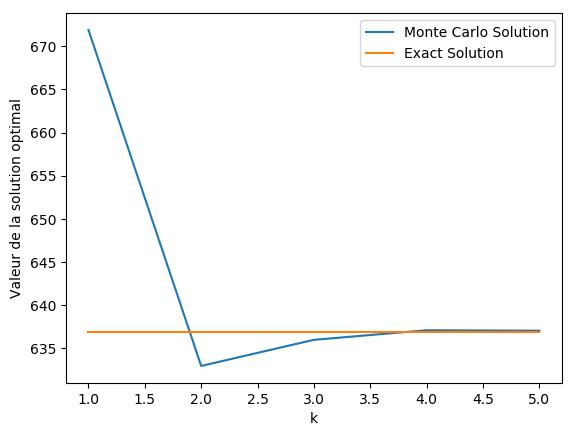

In [57]:
plot(1:5, monte_carlo_sol, label="Monte Carlo Solution")
plot(1:5, fill(solutions_optimales[81], 5), label="Exact Solution")
xlabel("k")
ylabel("Valeur de la solution optimal")
legend()
show()

Définissant l'ordre de convergance vers notre valeur optimal de 636.8 pour x. 

<center> $ p = \frac{\log{\epsilon_1} - \log{\epsilon_2}}{k_2 - k_1} $

In [74]:
# Ordre de convergence de la méthode Monte Carlo
error = monte_carlo_sol - solutions_optimales[81]

5-element Array{Float64,1}:
 35.0421  
 -3.94775 
 -0.919844
  0.193707
  0.138772

In [75]:
n = [log10(abs(error[i])) - log10(abs(error[i+1])) for i in 1:4]

4-element Array{Float64,1}:
 0.948241
 0.632635
 0.67657 
 0.144843

Comme nous pouvons le constatez, la modélisation du problème est correct sauf qu'en discrétisant la demande avec $10^k$ ou k = 1..6 échantillons, on a beaucoup de problème à résoudre le modèle étant donné sa grosseur. Cependant, on peut quand même voir qu'en augmentant la valeur de k, notre valeur optimal converge vers celle que nous avons eu avec l'analyse analytique, soit environ 636.8 pour x. On voit aussi que la convergence est d'ordre sous-linéaire.

On note que pour la simulation de Monte Carlo, nous n'avons pas calculé la solution pour une valeur de k = 6. Les ordinateurs personnelles à notre disposition ont manqué de mémoire vive pour le calcul. On note que le problème augmente avec un odre $10^k$ avec k. En effet, pour k = 6, nous avons un million d'échantillonages ce qui créer un problème avec un million de contraintes et deux million et une variables.

Dans la prochaine section, nous présentons une autre méthode Monte Carlo qui tente aussi de trouver le nombre optimal de journeaux et qui évite notre problème de computation de système d'optimisation énorme En effet, nous n'allons même avoir besoin de résoudre un système d'optimisation.

### Discrétisation en nombre entier

Étant donné que la demande peut seulement être discrète (on ne peut pas avoir une demande de 650$\textbf{.2}$ journaux), il est étrange de discrétiser le problème sur un si gros nombre d'échantillons. Il serait beaucoup plus efficace de discrétiser la probabilité pour chaque demande possible $[1,2,3...u]$ ou u serait une limite supérieur qu'on donnerait à notre problème. 

Ainsi, nous proposons une méthode Monte Carlo qui détermine pour chaque demande dans un intervalle de solutions de 450 à 850 la valeur moyenne de la solution en tirant un nombre 10^k échantillon de notre distribution. La valeur de solutions ayant une valeur moyenne de solution maximal sera notre valeur optimal du problème. 

Pour rester dans le contexte du problème, nous avons redéfinie la contrainte $y + w <= x$ comme $y + w = x$ pour optimiser le calcul. Nous avons essayer cette optimisation vu que les variables y et w représentent les profits (ventes et retours) et que c'est logique d'assumer que le maximum de profit vont avoir lieu lorsque la quantité de journaux vendus et retourné seront à leur maximum possible, soit x.

In [80]:
function secondstage(d::Float64, x::Int)
    c = 0.15
    q = 0.25
    r = 0.02
    
    if d > x
        return x*(q-c)
    else
        return (d*q + (x-d)*r - x*c)
    end

end

secondstage (generic function with 1 method)

In [127]:
function monte_monte_carlo(k::Int)
    Mean_X = Array{Float64}(401)
    
    srand(123) # Setting the seed
    d = Normal(650, 80)
    

    temp = Array{Float64}(10^k)
    for i = 450:850

        for j = 1:10^k
            temp[j] = secondstage(rand(d), i)
        end

        Mean_X[i-449] = mean(temp)
    end
    f = figure()
    plot(450:850,Mean_X)
    title("k = $k")
    xlabel("Nombre de journaux achetés")
    ylabel("Valeur moyenne de la solution")
    x_star = 450 + findmax(Mean_X)[2]
    println("Nombre de journeaux acheter optimal k_$k = $x_star")
end

monte_monte_carlo (generic function with 1 method)

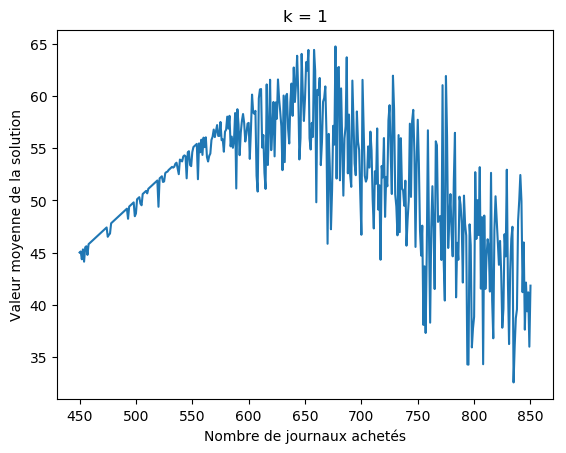

Nombre de journeaux acheter optimal k_1 = 678


In [128]:
monte_monte_carlo(1)

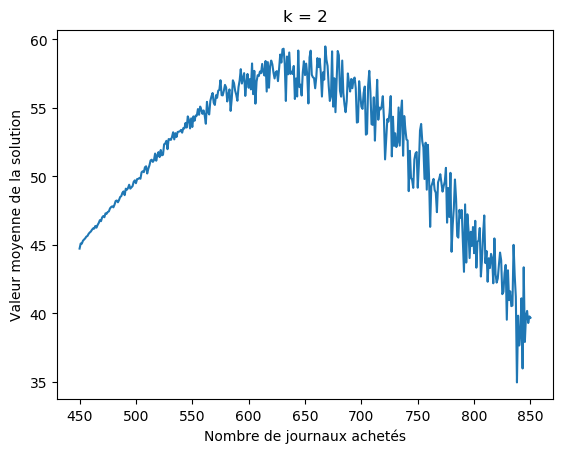

Nombre de journeaux acheter optimal k_2 = 669


In [129]:
monte_monte_carlo(2)

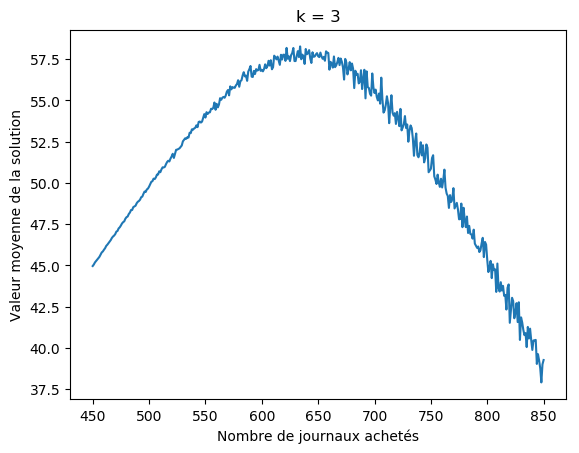

Nombre de journeaux acheter optimal k_3 = 635


In [130]:
monte_monte_carlo(3)

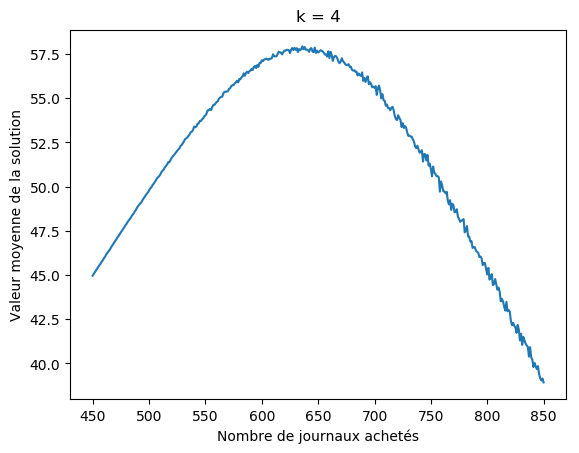

Nombre de journeaux acheter optimal k_4 = 637


In [131]:
monte_monte_carlo(4)

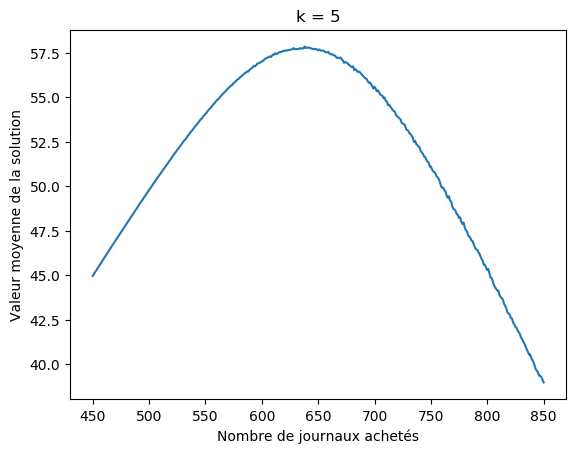

Nombre de journeaux acheter optimal k_5 = 639


In [132]:
monte_monte_carlo(5)

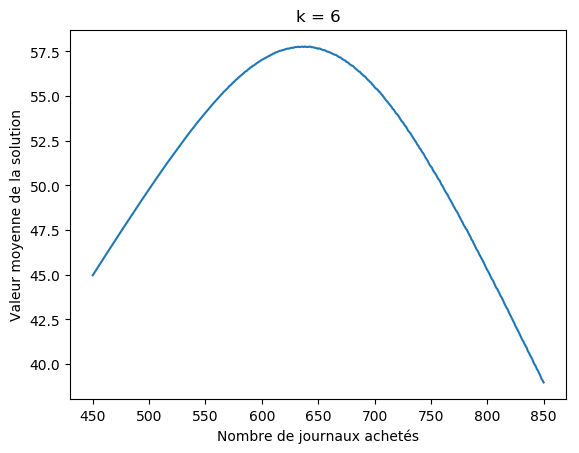

Nombre de journeaux acheter optimal k_6 = 639


In [133]:
monte_monte_carlo(6)

Comme vous pouvez le constatez dans notre image, on peut voir que les meilleurs solution sont pres de la valeurs estimer (soit 639 pour ecart-type = 80). Nous avons obtenus le graphe en estimant 10^k tirs pour chaque demande possible. Nous avons ensuite pris la moyenne de tous ces essaies et les afficher en fonction du nombre de journaux acheter, soit notre decision First-Stage. 

Lorsqu'on essaie avec des valeurs de k plus faible. On peut remarquer que beaucoup de bruit s'introduit dans nos données et qu'elle sont beaucoup moins fluides. C'est due au fait que nous avons besoin de beaucoup d'échantillonnages pour bien représenter toutes les possibilités de notre modèle.

Notre solution finale tend très proche des des valeurs obtenus précédement avec les méthodes analytique. 